# <center>NLP Project - Spam and Ham messages Identification</center>

![](https://miro.medium.com/max/1575/1*7LNPizh5WswwxwGzMT1YOg.jpeg)

## Table of Contents

01. <a href="#Library-Import">Library Import</a>
02. <a href="#Introduction-of-Dataset">Introduction of Dataset</a>
03. <a href="#EDA">EDA</a>
04. <a href="#Text-Preprocessing">Text Preprocessing</a>
05. <a href="#Normalization">Normalization</a>
06. <a href="#Vectorization">Vectorization</a>
07. <a href="#TF---IDF">TF - IDF</a>
08. <a href="#Model-Training">Model Training</a>
09. <a href="#Model-Evaluation">Model Evaluation</a>
10. <a href="#Train-Test-Split">Train Test Split</a>
11. <a href="#Creating-a-Data-Pipeline">Creating a Data Pipeline</a>
12. <a href="#Resources">Resources</a>
13. <a href="#Acknowledgement">Acknowledgement</a>

## Library Import

In [18]:
# We will run this cell only once

import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction of Dataset

**Data Source:** [UCI Machine Learning Repository - SMS Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)

We will use the dataset we have downloaded from this source. The file we are using contains a collection of more than 5 thousand SMS phone messages.

In [6]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
len(messages)

5574

A collection of texts is also sometimes called **"corpus"**.

In [17]:
# We are printing the first 10 messages using enumerate.

for message_no, message in enumerate(messages[:10]):
    print(message_no, message, end = '\n\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341.

- The first column is coming for using enumerate and this is not a part of our dataset. The second column is a **label** denoting whether the given message is a normal message (commonly known as "ham") or "spam". The third column is the **message itself**. 

- We'll train a machine learning model to learn to **discriminate** between ham/spam automatically. Then, with a trained model, we'll be able to **classify** arbitrary unlabeled messages as ham or spam.

In [20]:
# Since the file is a TSV file, so we will use pandas 'read_csv' function to import it into a pandas dataframe. 

messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [22]:
# Getting a stat about the dataset

messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Key Takeways:

- There is no null value in the label and message column as both of them have 5572 rows. 
- Label column has two unique values while message column has 5169 unique message about 5572 total messages. 
- We can see that most of the messages are labeled as **ham** and top ham message is 'Sorry, I'll call later'.
- 4825 messages are labeled as ham messages out of 5572 and 'Sorry, I'll call later' appeares 30 times in message column. 

We can get a better scenerio of above description by grouping against `label` column. 

In [32]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Messages Length might be an interesting feature. So we will create an new column called `length` to explore more about the feture importance. 

In [35]:
messages['length'] = messages['message'].apply(len)
messages.head(3)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


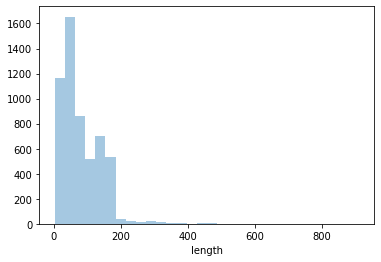

In [53]:
sns.distplot(a = messages['length'], bins = 30, kde = False)

We may wonder why the x-axis goes all the way to 1000! This must mean that there is some really long message!

In [54]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

The message having maximum length has 910 characters. Let's see the message. 

In [68]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021363D134E0>,
      dtype=object)

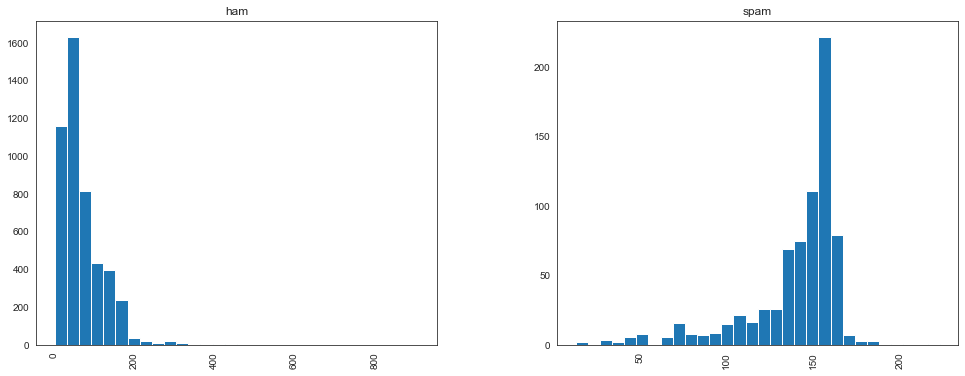

In [77]:
messages.hist(column = 'length', by = 'label', bins = 30, figsize = (16, 6))

This clearly tells us the ham messages have shorter length while spam messages have higher length. 

## Text Pre-processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.

In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, we will write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. 

Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [82]:
# Removing Punctuations

import string

mess = 'Sample message! Notice: it has punctuation.'
no_punc = [char for char in mess if char not in string.punctuation]
no_punc = ''.join(no_punc)
print(no_punc)

Sample message Notice it has punctuation


In [90]:
# Removing Stop-words

from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')

words = [word for word in no_punc.split() if word.lower() not in all_stopwords]
words

['Sample', 'message', 'Notice', 'punctuation']

In [93]:
# Combining these two preprocessing steps into a single function:

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Checking each character to see if there is any punctuation
    no_punc = [char for char in mess if char not in string.punctuation]
    
    # Joining characters to return back to words format
    no_punc = ''.join(no_punc)
    
    # Removing stopwords
    words = [word for word in no_punc.split() if word.lower() not in all_stopwords]
    
    return words

Now we'll "tokenize" these messages. Tokenization is the process of converting the normal text strings in to a list of tokens (words that we actually want).

In [95]:
# Before tokenize

messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [98]:
# After tokenize

messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand. We can explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

## Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the `analyzer` to be our own previously defined function:

In [105]:
# Bag of words (bow)

bow_transformer = CountVectorizer(analyzer = text_process)
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x0000021363E22400>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [108]:
# Getting to know each words and it's count in our model

bow_transformer.vocabulary_

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [107]:
# Total number of vocab words

len(bow_transformer.vocabulary_)

11425

Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [120]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [124]:
# Vector representation of the message is 

bow4 = bow_transformer.transform([message4])
print(bow4)

print()
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2

(1, 11425)


This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once.

In [116]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


Now we can use `.transform` on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix.

In [128]:
messages_bow = bow_transformer.transform(messages['message'])

In [129]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [130]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

### TF - IDF 

TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

**Example:**

Let's consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. 

Now, let's assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [132]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [133]:
# For a particular message e.g. 4th message

tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


We will check what is the IDF (inverse document frequency) of the word "u" and of word "university"?

In [136]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


Now we will transform the entire bag-of-words corpus into TF-IDF corpus at once

In [143]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)
print()
print(messages_tfidf)

(5572, 11425)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569,

There are many ways the data can be preprocessed and vectorized. These steps involve feature engineering and building a "pipeline"

## Model Training

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier algorithm is a good choice.

In [145]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB()

spam_detect_model.fit(messages_tfidf, messages['label'])        # fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Let's try classifying our single random message and checking how we do:

In [150]:
print('Predicted:', spam_detect_model.predict(tfidf4)[0])
print('Actual:', messages['label'][3])

Predicted: ham
Actual: ham


So we have finished training our model. Now we will evaluate the performance of our model. 

## Model Evaluation

In [151]:
all_predictions = spam_detect_model.predict(messages_tfidf)
all_predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

We can use SciKit Learn's built-in classification report, which returns [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), and a column for support (meaning how many cases supported that classification).

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width = 400 />

There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For example, the cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".

In [152]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In the above "evaluation",we evaluated accuracy on the same data we used for training. **We should never actually evaluate on the same dataset you train on!**

Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

A proper way is to split the data into a training/test set, where the model only ever sees the **training data** during its model fitting and parameter tuning. The **test data** is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.

## Train Test Split

In [155]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.2)

## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](https://scikit-learn.org/stable/modules/compose.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [158]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),      # strings to token integer counts
    ('tfidf', TfidfTransformer()),                          # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),                        # train on TF-IDF vectors w/ Naive Bayes classifier
])

We have created tuple for each of the operations. The first value of the tuple is a name (it can be any) and the second value is the steps we are performing one after another. 

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API.

In [159]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021363E22400>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [160]:
predictions = pipeline.predict(msg_test)

In [161]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1015
        spam       0.69      1.00      0.82       100

    accuracy                           0.96      1115
   macro avg       0.84      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



## Resouces

- [NLTK Book Online](http://www.nltk.org/book/)
- [Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)
- [SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

## Acknowledgement

**@**[Reference Course](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/)    
**@**[Instructor](https://www.udemy.com/user/joseportilla/)  
**@**[Pieriandata](https://www.pieriandata.com/)

### <center>[move to top](#Table-of-Contents)</center>